# import

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [17]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

# 모듈

In [23]:
# , 제거
def delcom(x):
    result = x.replace(',','')
    return result

# data

In [4]:
product=pd.read_csv('01_Pruduct.csv')
print(product.shape)
product.info()

C:\Users\meuch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(5024906, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [5]:
search1=pd.read_csv('02_Search1.csv')
print(search1.shape)
search1.info()

(2884943, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884943 entries, 0 to 2884942
Data columns (total 4 columns):
CLNT_ID       int64
SESS_ID       int64
KWD_NM        object
SEARCH_CNT    int64
dtypes: int64(3), object(1)
memory usage: 88.0+ MB


In [6]:
search2=pd.read_csv('03_Search2.csv',parse_dates=["SESS_DT"])
print(search2.shape)
search2.info()

(8051172, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051172 entries, 0 to 8051171
Data columns (total 3 columns):
SESS_DT       datetime64[ns]
KWD_NM        object
SEARCH_CNT    object
dtypes: datetime64[ns](1), object(2)
memory usage: 184.3+ MB


In [7]:
custom=pd.read_csv('04_Custom.csv')
print(custom.shape)
custom.info()

(671679, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671679 entries, 0 to 671678
Data columns (total 3 columns):
CLNT_ID        671679 non-null int64
CLNT_GENDER    671679 non-null object
CLNT_AGE       671679 non-null int64
dtypes: int64(2), object(1)
memory usage: 15.4+ MB


In [21]:
session=pd.read_csv('05_Session.csv',parse_dates=['SESS_DT'])
print(session.shape)
session.info()

(2712907, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            int64
SESS_ID            int64
SESS_SEQ           int64
SESS_DT            datetime64[ns]
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 186.3+ MB


In [9]:
master=pd.read_csv('06_Master.csv')
print(master.shape)
master.info()

(847652, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
PD_C        847652 non-null int64
PD_NM       847652 non-null object
CLAC1_NM    847652 non-null object
CLAC2_NM    847652 non-null object
CLAC3_NM    847652 non-null object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


# 결측치

In [13]:
product.isnull().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_ADD_NM    0
PD_BRA_NM    0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

In [14]:
search1.isnull().sum()

CLNT_ID       0
SESS_ID       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [15]:
search2.isnull().sum()

SESS_DT       0
KWD_NM        0
SEARCH_CNT    0
dtype: int64

In [13]:
custom.isnull().sum()

CLNT_ID        0
CLNT_GENDER    0
CLNT_AGE       0
dtype: int64

In [14]:
session.isnull().sum()  #결측치 발견

CLNT_ID                0
SESS_ID                0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

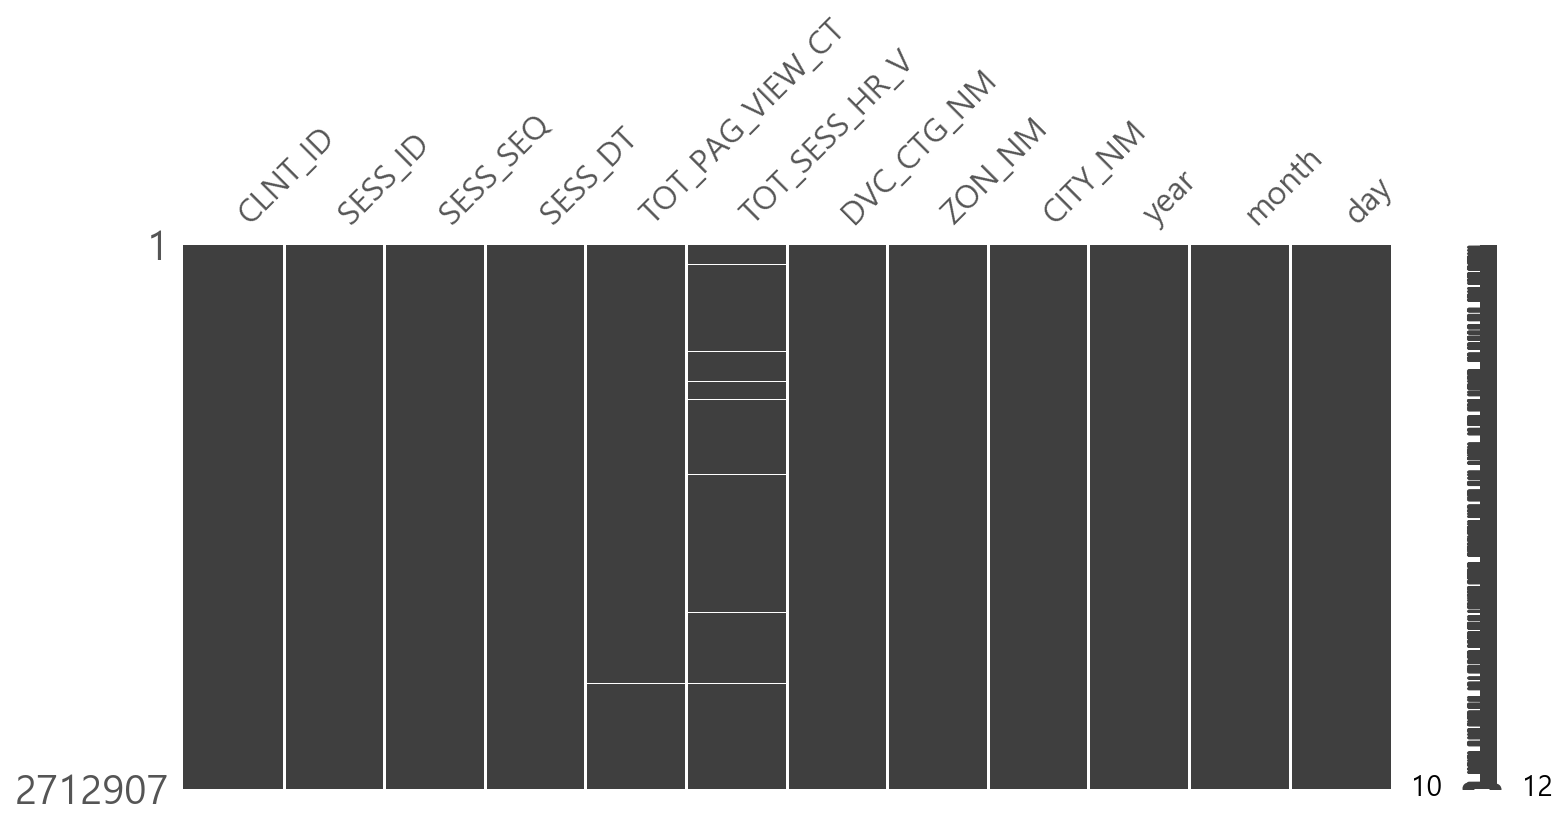

In [31]:
import missingno as msno
# conda install -c conda-forge/label/cf201901 missingno
msno.matrix(session, figsize=(12,5))

In [16]:
master.isnull().sum()

PD_C        0
PD_NM       0
CLAC1_NM    0
CLAC2_NM    0
CLAC3_NM    0
dtype: int64

# 날짜 데이터 년월일 칼럼 추가
 - search2
 - session

In [10]:
search2['year']=search2['SESS_DT'].dt.year
search2['month']=search2['SESS_DT'].dt.month
search2['day']=search2['SESS_DT'].dt.day

In [11]:
session['year']=session['SESS_DT'].dt.year
session['month']=session['SESS_DT'].dt.month
session['day']=session['SESS_DT'].dt.day

# Ⅰ. product 

## product 칼럼 전처리

In [12]:
product.head(10)
# PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경
# 총 판매량 추가
# PD_BRA_NM에 [] 가 있는 자료가 있고 없는 자료가 있음 [] 제거
# PD_ADD_NM 에 색상, 사이즈, 갯수가 모두 포함되어있음.
# PD_C의 큰 분류인 master 데이터의 CLAC1_NM을 추가



,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],"39,000",1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,"39,000",2
2,4142395,6158159,85,179538,(not set),[아베다],"39,000",1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,"39,000",1
4,4144917,6406509,78,190306,5개,데코르테,"39,000",5
5,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,"39,000",1
6,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,[디스커버리],"39,000",1
7,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,"39,000",1
8,4148129,3942102,2,755148,모델명:올나이터 / 1개,어반디케이,"39,000",1
9,4148527,5718021,19,608620,사이즈:7 / 1개,나이키,"39,000",1


### Ⅰ- 1. PD_BUY_AM 콤마 지우기 PD_BUY_AM, PD_BUY_CT DTYPE INT로 변경

In [13]:
# CT가 형태가 혼합이 되어있다. STR로 변환 후 컴마 제거 후 INT로 변경
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('str')

In [14]:
product['PD_BUY_AM']=product['PD_BUY_AM'].apply(delcom)
product['PD_BUY_CT']=product['PD_BUY_CT'].apply(delcom)

In [15]:
product['PD_BUY_AM']=product['PD_BUY_AM'].astype('int')
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('int')


### Ⅰ- 2. 총 판매량 추가

In [16]:
product['PD_BUY_TOTAL']=product['PD_BUY_AM']*product['PD_BUY_CT']

### Ⅰ- 3. PD_BRA_NM에 [ ]제거 

In [17]:
## 값이 각각 있다는 것을 알 수 있음  -> ex)'아베다'로 통일
print('아베다 = ',sum(product['PD_BRA_NM']=='아베다'))

print('[아베다] = ',sum(product['PD_BRA_NM']=='[아베다]'))


아베다 =  5719
[아베다] =  1285


In [18]:
product['PD_BRA_NM']=product['PD_BRA_NM'].apply(lambda x : x.translate({ord('['):'',
                                                   ord(']'):''}))
print(sum(product['PD_BRA_NM']=='아베다'))

7004


In [19]:
product

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,6158159,85,179538,(not set),아베다,39000,1,39000
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,6406509,78,190306,5개,데코르테,39000,5,195000
...,...,...,...,...,...,...,...,...,...
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),39000,1,39000
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,39000,1,39000
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,39000,1,39000
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,39000,1,39000


### Ⅰ- 4. PD_ADD_NM 에 색상, 사이즈 분리

- 색상 뽑기(너무 형태가 많아서 뽑아야 할지 고민)의류만 추출해서 뽑는게 가벼울듯!

In [21]:
#색상을 어떤 키워드로 구분하는지 파악하자
print('색상:',sum(product['PD_ADD_NM'].str.contains("색상:")))
print('색:',sum(product['PD_ADD_NM'].str.contains("색:")))
print('색깔:',sum(product['PD_ADD_NM'].str.contains("색깔:")))
print('color:',sum(product['PD_ADD_NM'].str.contains("color:")))
print('COLOR:',sum(product['PD_ADD_NM'].str.contains("COLOR")))
print('Color',sum(product['PD_ADD_NM'].str.contains("Color")))
print('col:',sum(product['PD_ADD_NM'].str.contains("col:")))
print('컬러:',sum(product['PD_ADD_NM'].str.contains("컬러:")))
print('칼라:',sum(product['PD_ADD_NM'].str.contains("칼라:")))


색상: 2329099
색: 459
색깔: 22
color: 45783
col: 0
컬러: 50053
칼라: 1990


In [27]:
sum(product['PD_ADD_NM'].str.contains("색상사이즈"))


21081

In [24]:
2329099+459+22

2329580

In [29]:
def wcolor(strdata):
    if strdata.find('색상:')<0:
        return np.nan
    else:
        start_idx=strdata.find("색상:")+3
        start_idx=strdata.find("color:")+6
        end_idx1=strdata.find('|')
        end_idx2=strdata.find('/')
        if end_idx1>-1:
            color = strdata[start_idx:end_idx1]
            return color
        elif end_idx2>-1:
            color = strdata[start_idx:end_idx2]
            return color
        else:
            color = strdata[start_idx:]
            return color

In [30]:
product['PD_COLOR']=product['PD_ADD_NM'].apply(wcolor)

In [31]:
product['PD_COLOR'].head(10)

0                멜론
1    K0_(BLK0)BLACK
2               NaN
3                  
4               NaN
5               NaN
6            블랙(BK)
7    K0_(BLK0)BLACK
8               NaN
9               NaN
Name: PD_COLOR, dtype: object

In [148]:
wcolor(product['PD_ADD_NM'][0])

'워터멜론'

In [152]:
wcolor(product['PD_ADD_NM'][6])

'블랙(BK)'

In [153]:
wcolor(product['PD_ADD_NM'][10])

'BLK'

In [145]:
sss.find('/')

4

45783

In [81]:
product.head(50)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,39000
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000
2,4142395,6158159,85,179538,(not set),아베다,39000,1,39000
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000
4,4144917,6406509,78,190306,5개,데코르테,39000,5,195000
5,4147643,4050743,66,149995,사이즈:옵션04.AN868_04 / 1개,앵글로매니아,39000,1,39000
6,4147739,6881895,10,568751,신발색상:블랙(BK)/신발사이즈:280,디스커버리,39000,1,39000
7,4148106,6537318,21,570603,색상:BLK0_(BLK0)BLACK|사이즈:115 / 1개,데상트,39000,1,39000
8,4148129,3942102,2,755148,모델명:올나이터 / 1개,어반디케이,39000,1,39000
9,4148527,5718021,19,608620,사이즈:7 / 1개,나이키,39000,1,39000


### Ⅰ- 5. PD_C의 큰 분류인 master 데이터의 CLAC1_NM을 추가

In [18]:
product_master=pd.merge(product,master,on='PD_C',how='left')

In [29]:
product_master

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_BUY_TOTAL,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,39000,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,메이크업,블러셔/쉐이딩/하이라이터
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2,78000,[데상트] 스포츠베이직 빅로고 티셔츠 - DMGR_DMELANGE / 115,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠
2,4142395,6158159,85,179538,(not set),아베다,39000,1,39000,[단독][6월] 라이트 엘리먼츠 헤어 에센스 세트,퍼스널케어,헤어케어,헤어케어선물세트
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1,39000,YG GU 3/4 TGT.A(BQ2873) - 블랙 / 110cm(6세),유아동의류,여아의류하의,여아레깅스
4,4144917,6406509,78,190306,5개,데코르테,39000,5,195000,(단독)허니듀 세트(+5만원 상당 샘플 증정),화장품/뷰티케어,스킨케어,스킨케어세트
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024901,4132078,10042817,76,527736,코드:s_kk_1205030|사이즈:BLACK 90 / 1개,아디다스(의류),39000,1,39000,아디다스 CE2014 M10쇼츠W 여성 숏팬츠 반바지 - s_kk_1205030 /...,스포츠패션,여성일반스포츠의류,여성일반스포츠바지
5024902,4133768,7272433,31,284643,색상:(42)블루|사이즈:55 / 1개,제이제이 지고트,39000,1,39000,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠
5024903,4133768,7946785,38,284643,색상:(60)아이보리|사이즈:55 / 1개,제이제이 지고트,39000,1,39000,퍼프소매 주름 블라우스 (GH6A0BL80) - (60)아이보리 / 77,여성의류,여성의류상의,여성남방셔츠
5024904,4134952,5355187,113,840639,사이즈:Medium / 1개,배럴,39000,1,39000,우먼 브라탑 래쉬가드 화이트 (BW5WBRT001WHSM) - XS,시즌스포츠,수영/물놀이,여성비치웨어


### Ⅰ- 6. EDA

- PD_BUY_AM 분포

In [25]:
pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(product_master['PD_BUY_AM'].describe())

,PD_BUY_AM
count,5024906.00
mean,51349.45
std,117383.57
min,10.00
25%,12900.00
50%,28000.00
75%,49900.00
max,17779000.00


- 브랜드별 통계치

In [19]:
TOP100_BRAND=product_master.pivot_table(index='PD_BRA_NM',
                            values='PD_BUY_TOTAL',
                          aggfunc=['count','sum'])
TOP100_BRAND.head(10)

,count,sum
,PD_BUY_TOTAL,PD_BUY_TOTAL
PD_BRA_NM,,
#텐텐,314,8548660.0
(유)자연식품,36,1028700.0
(주) 스마트 팩토리,2,105600.0
(주)그린키즈,12,28380.0
(주)다경,72,3482300.0
(주)두문,14,632500.0
(주)두잇,8,395500.0
(주)로드메일코리아,2,91000.0


In [20]:
# 판매 횟수가 가장 많은 브랜드
TOP100cnt_BRAND=TOP100_BRAND['count'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100cnt_BRAND

,PD_BUY_TOTAL
PD_BRA_NM,
지오다노,95764
나이키,59501
탑텐,41399
정관장,40551
에이치커넥트,40085
...,...
샤넬,9116
빌리프,9070
보니알렉스,9062


Text(0.5, 1.0, '브랜드별 count')

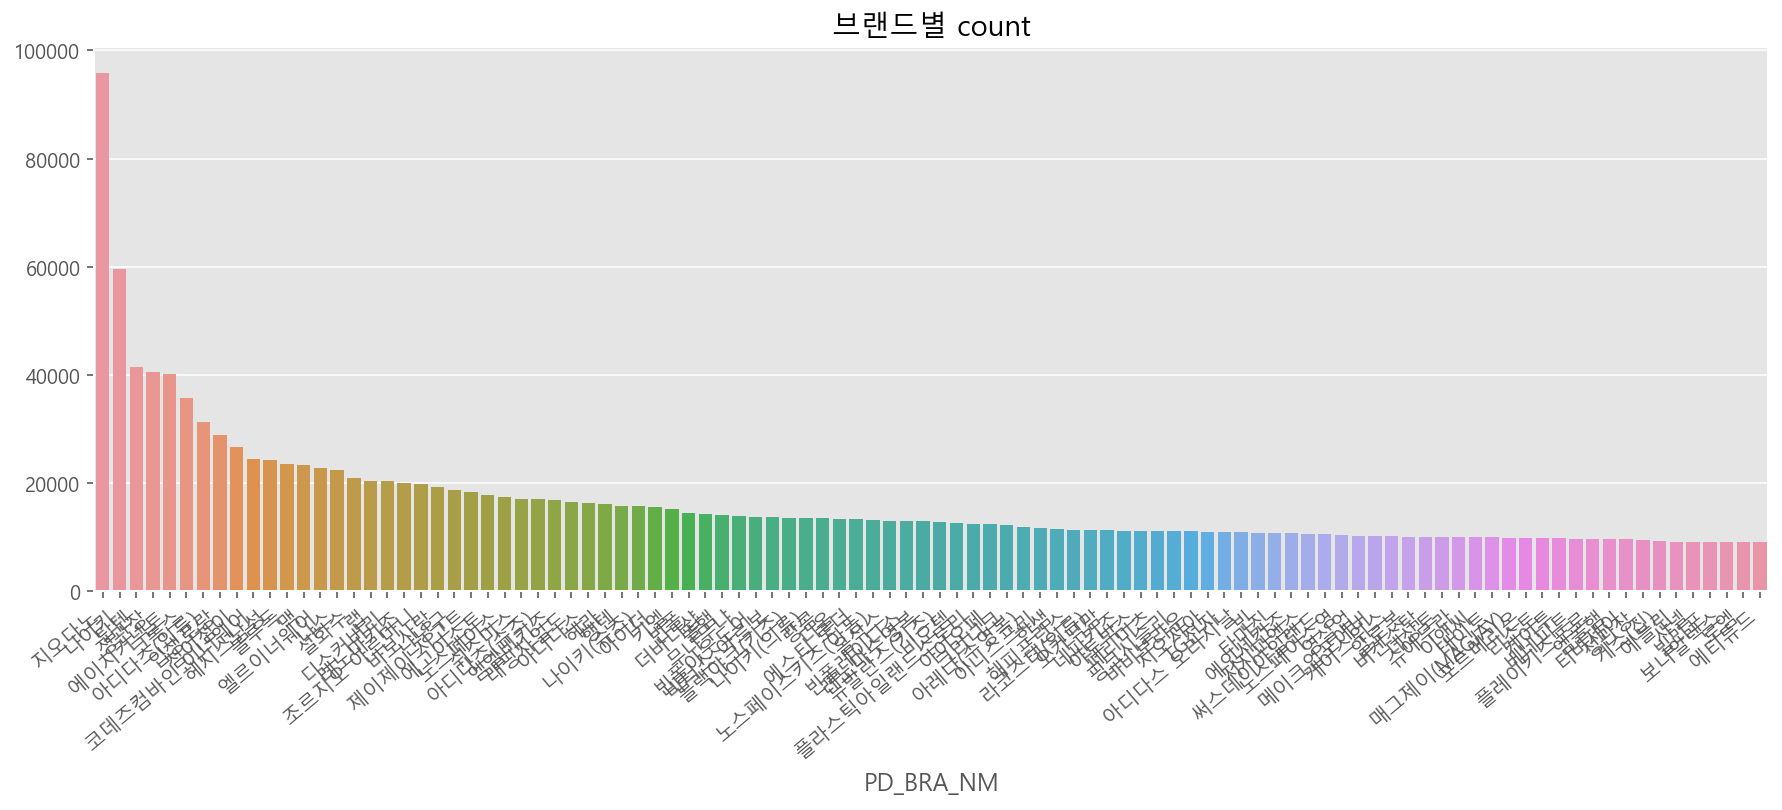

In [47]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100cnt_BRAND.index, y=np.ravel(TOP100cnt_BRAND.values,order='F'))
plt.title("브랜드별 count")

In [30]:
# 판매 금액이 가장 많은 브랜드
pd.options.display.float_format = '{:.2f}'.format
TOP100sell_BRAND=TOP100_BRAND['sum'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100sell_BRAND

,PD_BUY_TOTAL
PD_BRA_NM,
LG전자,10423858792.00
정관장,6707459950.00
삼성전자,4216742164.00
나이키,4103931370.00
프라다,3493394039.00
...,...
씨씨콜렉트,452410880.00
쿠론,452274000.00
에이치커넥트,451507770.00


Text(0.5, 1.0, '브랜드별 판매액')

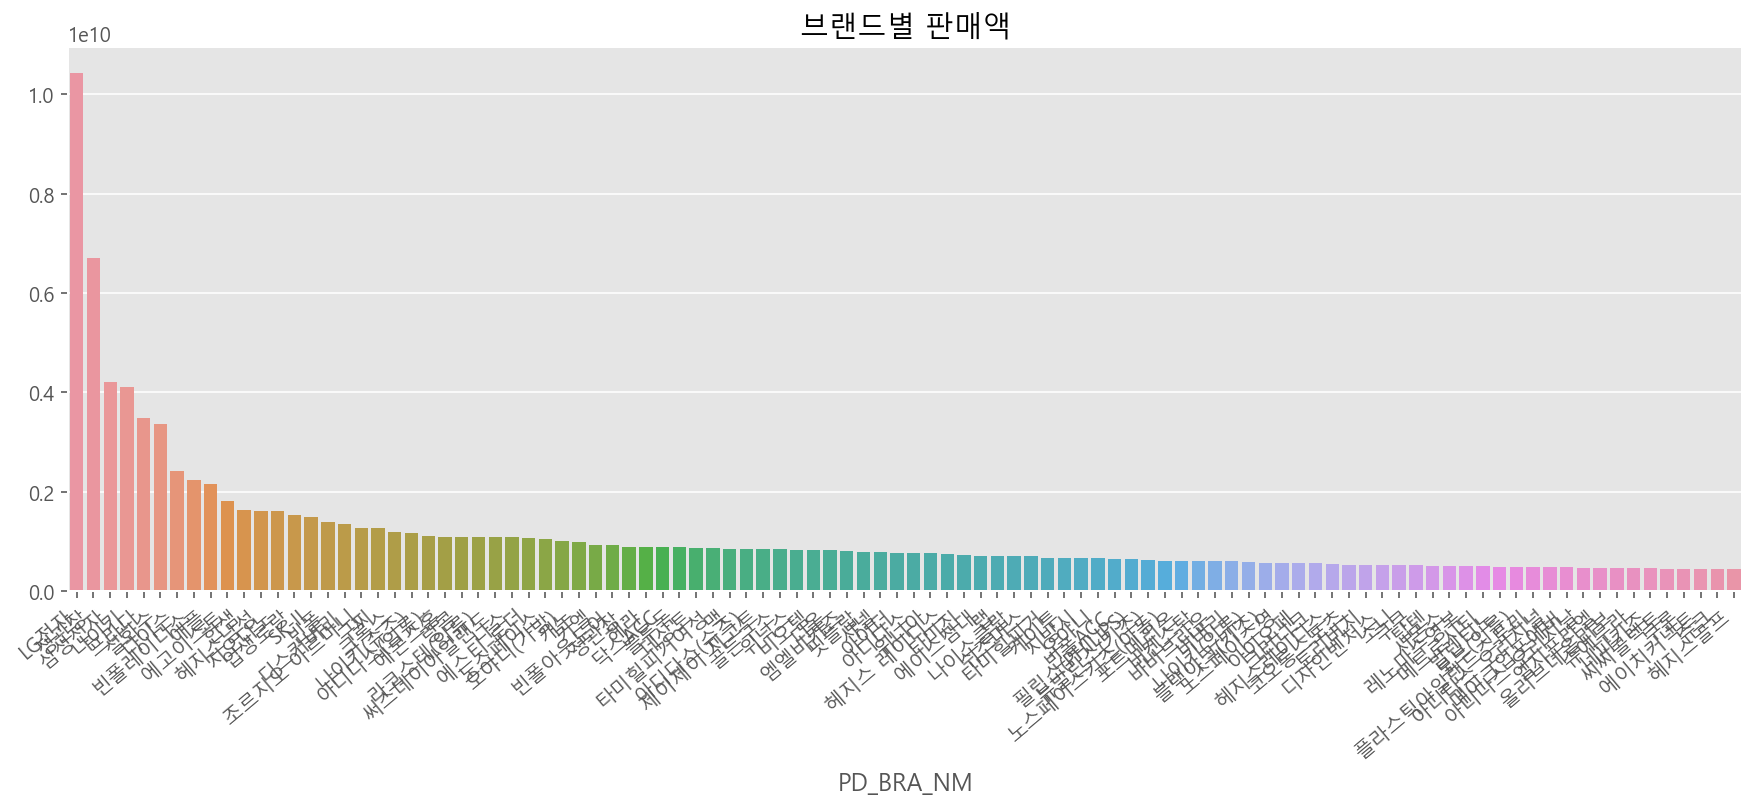

In [48]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100sell_BRAND.index, y=np.ravel(TOP100sell_BRAND.values,order='F'))
plt.title("브랜드별 판매액")

- category1 별 분포 (count)

In [32]:
pd.options.display.float_format = '{:.2f}'.format
TOP100_CAT1=product_master.pivot_table(index='CLAC1_NM',
                            values='PD_BUY_TOTAL',
                          aggfunc=['count','sum'])
TOP100_CAT1.head(10)

,count,sum
,PD_BUY_TOTAL,PD_BUY_TOTAL
CLAC1_NM,,
가구,43485,12399026355.00
건강식품,123623,10762419216.00
계절가전,13886,5237918916.00
과일,25105,791061560.00
구기/필드스포츠,33899,2498330087.00
남성의류,554910,18457045085.00
냉동식품,13586,304740110.00
냉장/세탁가전,7524,7409639092.00


In [33]:
# 판매 횟수가 가장 많은 CAT1
TOP100cnt_CAT1=TOP100_CAT1['count'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100cnt_CAT1.head(10)

,PD_BUY_TOTAL
CLAC1_NM,
여성의류,677199
화장품/뷰티케어,574033
스포츠패션,564355
남성의류,554910
패션잡화,449032
속옷/양말/홈웨어,417473
유아동의류,341572
시즌스포츠,150424
출산/육아용품,141512


Text(0.5, 1.0, 'cat1별 count')

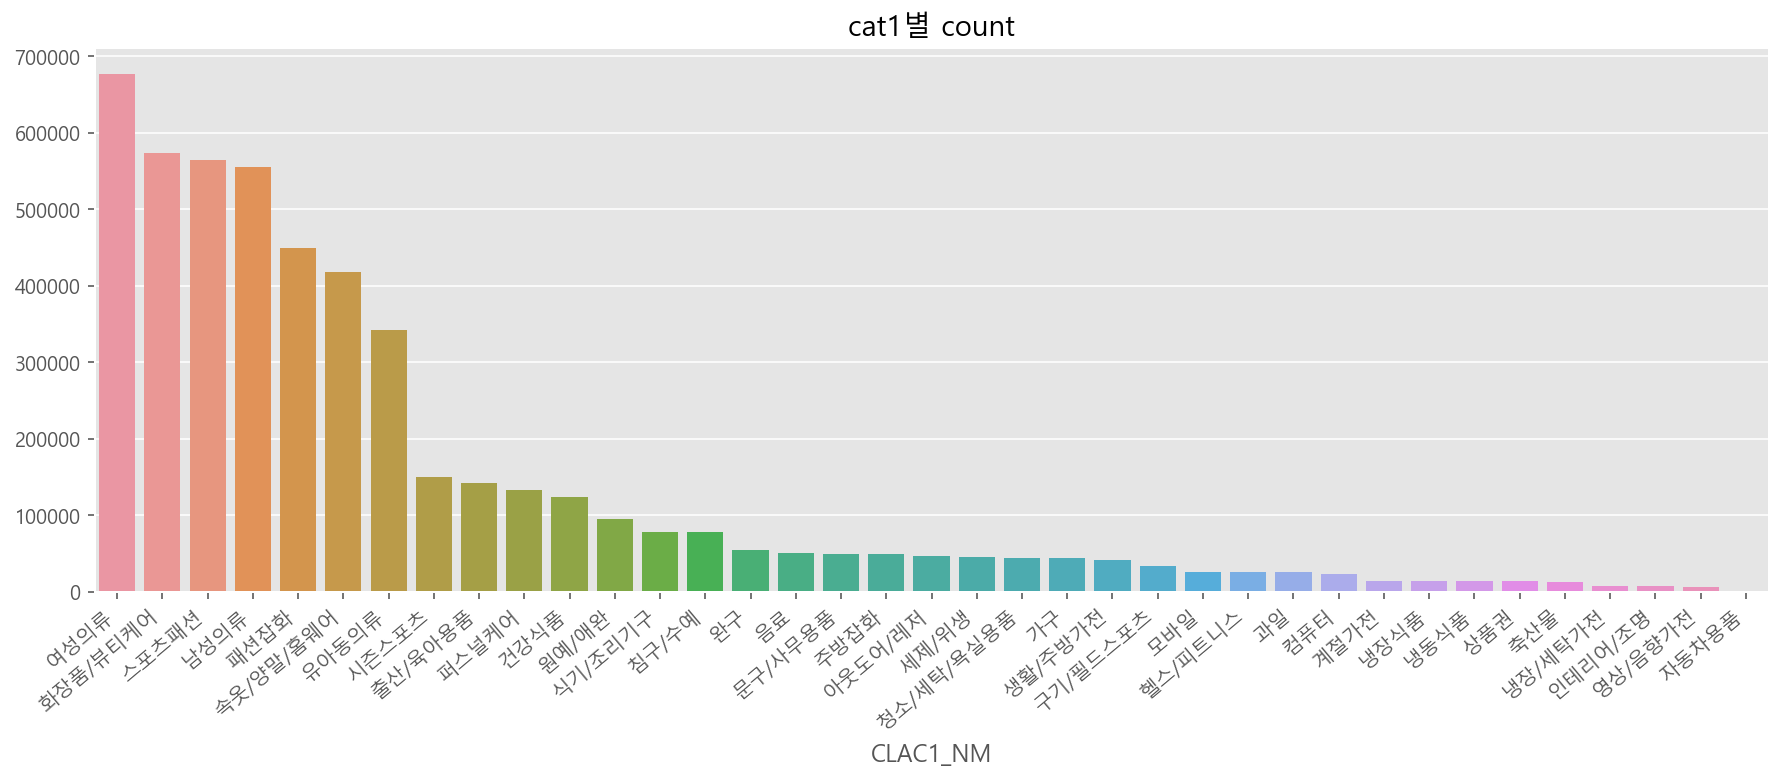

In [49]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100cnt_CAT1.index, y=np.ravel(TOP100cnt_CAT1.values,order='F'))
plt.title("cat1별 count")

In [34]:
# 판매 금액이 가장 많은 CAT1
pd.options.display.float_format = '{:.2f}'.format
TOP100sell_CAT1=TOP100_BRAND['sum'].sort_values(['PD_BUY_TOTAL'],ascending=False).head(100)
TOP100sell_CAT1

,PD_BUY_TOTAL
PD_BRA_NM,
LG전자,10423858792.00
정관장,6707459950.00
삼성전자,4216742164.00
나이키,4103931370.00
프라다,3493394039.00
...,...
씨씨콜렉트,452410880.00
쿠론,452274000.00
에이치커넥트,451507770.00


Text(0.5, 1.0, 'cat1별 판매금액')

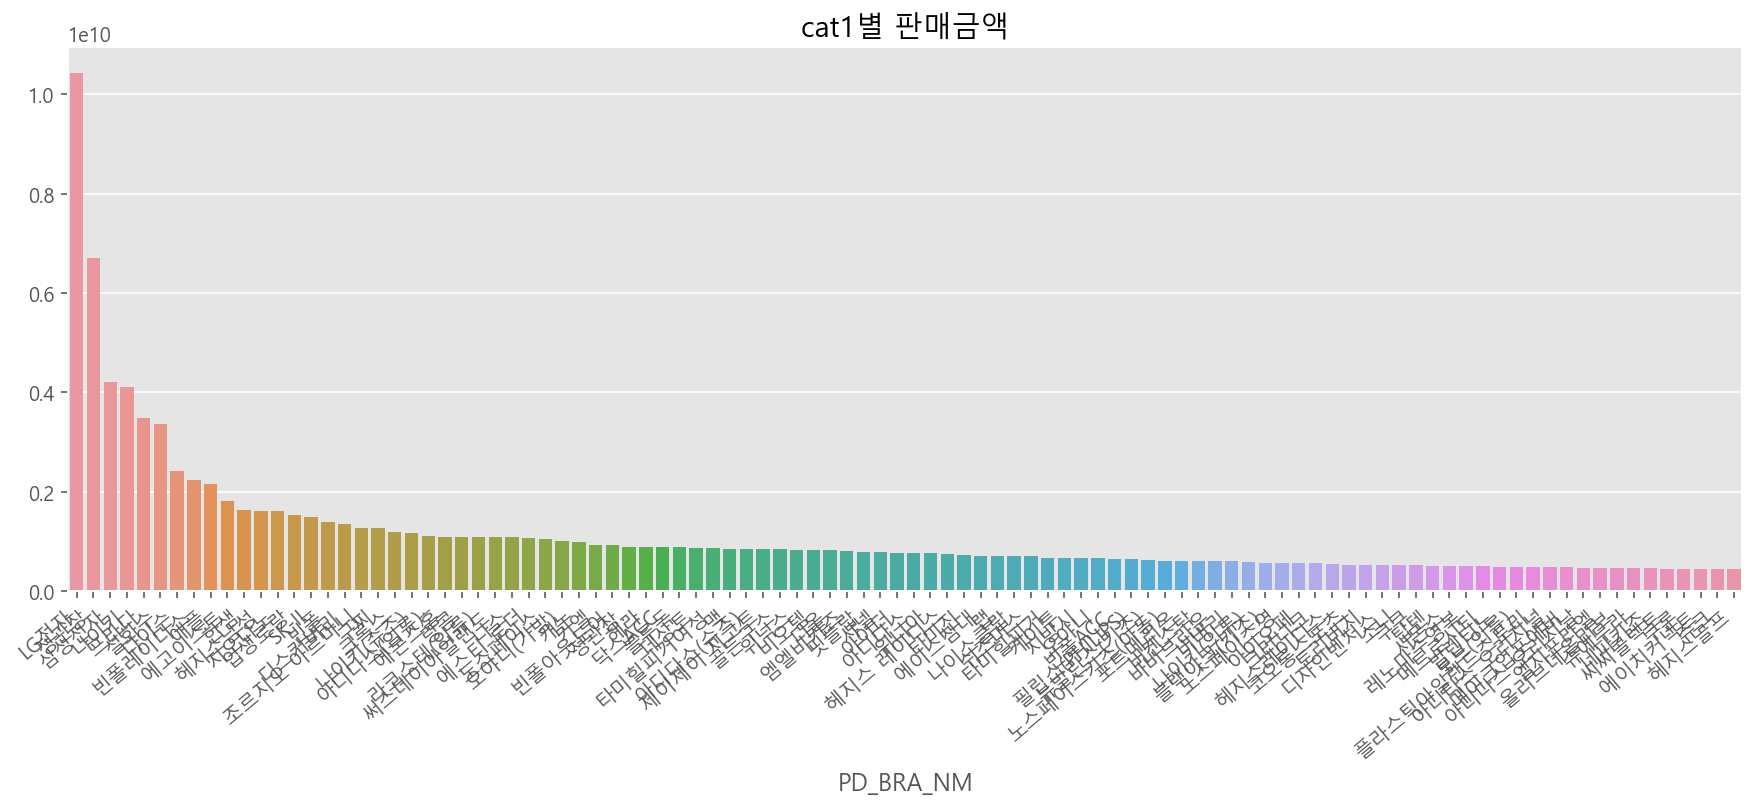

In [50]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=40,ha='right')
sns.barplot(x=TOP100sell_CAT1.index, y=np.ravel(TOP100sell_CAT1.values,order='F'))
plt.title("cat1별 판매금액")

- category2 별 분포 (count)

In [ ]:
#위와 동일 일단 생략

# Ⅱ. search1

## Ⅱ-1.

In [75]:
# 검색한 상품이 어떤 상품군(cat)에 속하는지 파악해야할 필요가 있다
# 그래야 CLNT_ID 별 검색 후 구매 성공까지 연결 지을 수 있다.
# 그러기 위해서는 product에서 상품명을 추출 한 후 search1에 cat1,2,3 를 추가해주는게 가장 베스트 

In [68]:
search1  # 클라이언트 id별

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
0,5607714,7112876,빌리프 아이크림,6
1,5607714,4090791,프리메라 마스크팩,3
2,5607714,4090791,여성청결제,1
3,5612428,1876482,명품가방,1
4,5612428,658123,콩순이 아이스크림,1
...,...,...,...,...
2884938,6391796,1822515,일자핏,1
2884939,6391796,1822515,화이트티셔츠,1
2884940,6391796,764020,양말,6
2884941,6391796,1822515,어항,2


In [71]:
search1.pivot_table(index = 'CLNT_ID',
                   values='SEARCH_CNT',
                   aggfunc='sum')

,SEARCH_CNT
CLNT_ID,
14,5
25,21
33,22
56,5
58,18
...,...
6592524,14
6592536,4
6592537,15


In [73]:
search1[search1['CLNT_ID']==58]

,CLNT_ID,SESS_ID,KWD_NM,SEARCH_CNT
582989,58,4328876,뉴발란스 반팔,3
582990,58,4328876,폴햄키즈,7
582991,58,4328876,데상트 남성 반팔 티셔츠,1
582992,58,4328876,폴햄,1
582993,58,4328876,리바이스,1
582994,58,4328876,리바이스키즈,1
582995,58,4328876,엠폴햄,1
582996,58,4328876,게스티셔츠,1
582997,58,4328876,반바지,1
582998,58,4328876,남성 반팔 티셔츠,1


# Ⅲ. search2

In [67]:
search2  # 날짜별

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
0,2018-04-07,닥스원피스,8,2018,4,7
1,2018-04-07,닥터지 브라이트닝,1,2018,4,7
2,2018-04-07,달팡 인트랄,2,2018,4,7
3,2018-04-07,대상트,1,2018,4,7
4,2018-04-07,더블유닷,6,2018,4,7
...,...,...,...,...,...,...
8051167,2018-09-12,stl수영복,3,2018,9,12
8051168,2018-09-12,supreme,2,2018,9,12
8051169,2018-09-12,tsdjpi82010,17,2018,9,12
8051170,2018-09-12,zen정장,12,2018,9,12


- 월별 날짜별 시간별 검색량 추세 파악

In [80]:
search2[search2['KWD_NM']=='데상트']

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
49593,2018-04-28,데상트,375,2018,4,28
117413,2018-04-22,데상트,571,2018,4,22
181267,2018-06-24,데상트,259,2018,6,24
190796,2018-04-01,데상트,469,2018,4,1
218356,2018-07-07,데상트,252,2018,7,7
...,...,...,...,...,...,...
7811828,2018-05-12,데상트,281,2018,5,12
7843092,2018-07-25,데상트,283,2018,7,25
7892543,2018-05-15,데상트,257,2018,5,15
7909172,2018-08-06,데상트,288,2018,8,6


In [79]:
search2[search2['KWD_NM']=='대상트']

,SESS_DT,KWD_NM,SEARCH_CNT,year,month,day
3,2018-04-07,대상트,1,2018,4,7
15258,2018-07-22,대상트,1,2018,7,22
50374,2018-04-22,대상트,3,2018,4,22
62895,2018-04-21,대상트,4,2018,4,21
104961,2018-04-17,대상트,1,2018,4,17
...,...,...,...,...,...,...
7587984,2018-09-20,대상트,2,2018,9,20
7680406,2018-05-23,대상트,1,2018,5,23
7841234,2018-08-26,대상트,3,2018,8,26
7952596,2018-09-29,대상트,3,2018,9,29


# Ⅳ. custom

In [36]:
custom

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30
...,...,...,...
671674,3725302,F,40
671675,3725462,M,40
671676,3725818,F,30
671677,3661812,F,30


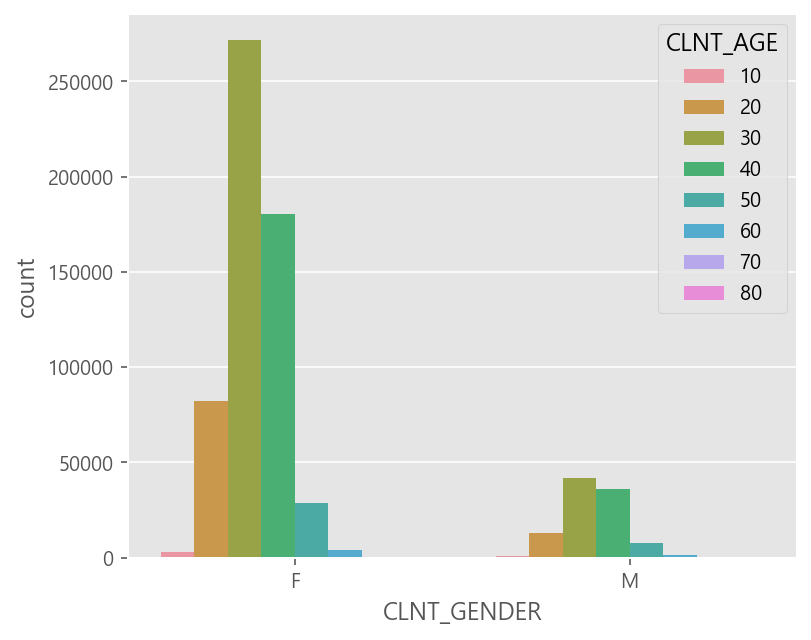

In [42]:
plt.figure(figsize=[6,5])

sns.countplot(data=custom,x='CLNT_GENDER',hue='CLNT_AGE')

# Ⅴ. session

In [46]:
session

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,year,month,day
0,5873599,8641867,9,2018-05-09,82.00,"1,890",mobile,Daejeon,Daejeon,2018,5,9
1,5873599,6616320,21,2018-06-11,105.00,"1,604",mobile,Busan,Busan,2018,6,11
2,5873599,5886172,40,2018-06-24,41.00,632,mobile,Daejeon,Daejeon,2018,6,24
3,5873884,1050889,15,2018-09-13,160.00,"1,035",mobile,Gyeonggi-do,Anyang,2018,9,13
4,5874461,10298270,5,2018-04-12,13.00,298,mobile,Seoul,Seoul,2018,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2712902,3500464,8713975,308,2018-05-08,71.00,423,mobile,Seoul,Seoul,2018,5,8
2712903,3501155,4636571,86,2018-07-14,44.00,"2,090",desktop,Seoul,Seoul,2018,7,14
2712904,3501397,582632,128,2018-09-20,164.00,"2,435",mobile,Seoul,Seoul,2018,9,20
2712905,3573271,2328407,9,2018-08-22,5.00,986,desktop,Busan,Busan,2018,8,22


- 컴마 지워주고 인트형으로 바꾸기

In [24]:
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype('str')
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].apply(delcom)

- 지도그리기

In [9]:
import geopandas as gpd
import os
# conda install geopandas
# conda install descartes

In [1]:
where=['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시',
      '세종특별자치시','울산광역시','인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [7]:
map_data=pd.DataFrame()

In [10]:
for i in range(len(where)):
    map_dir='D:/08_BA_project/lpoint/5th_lpoint_data/korea_location/'+where[i]

    file_name=os.listdir(map_dir)[1]
    
    dir_filename=map_dir+'/'+file_name
    
    data = gpd.read_file(dir_filename, encoding='euckr')
    map_data=pd.concat([map_data,data],axis=0)

In [15]:
map_data.geometry = map_data.buffer(0.001)

In [ ]:
map_data = map_data.dissolve(by='SIG_CD')

In [19]:
map_data

,geometry,BAS_MGT_SN,CTP_KOR_NM,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE
SIG_CD,,,,,,,,,,
11110,"POLYGON ((953116.139 1952230.380, 953110.416 1...",1111000027,서울특별시,종로구,03165,0.085469,20161027,20161027,통합에 의한 기초구역 변경,20161027000000
11140,"POLYGON ((952809.166 1950668.687, 952807.995 1...",1114000007,서울특별시,중구,04509,0.136612,20121221,None,None,None
11170,"POLYGON ((955433.677 1946450.477, 955433.677 1...",1117000007,서울특별시,용산구,04382,0.165194,20121221,None,None,None
11200,"POLYGON ((961382.291 1949073.897, 961232.021 1...",1120000055,서울특별시,성동구,04804,0.117056,20121221,None,None,None
11215,"POLYGON ((964806.966 1948611.430, 964805.862 1...",1121500031,서울특별시,광진구,05029,0.458800,20121221,None,None,None
...,...,...,...,...,...,...,...,...,...,...
48870,"POLYGON ((1014647.972 1713531.985, 1014647.973...",4887000041,경상남도,함양군,50040,0.038272,20121221,None,None,None
48880,"POLYGON ((1043867.377 1734858.493, 1043867.377...",4888000007,경상남도,거창군,50147,7.403139,20161027,20161027,기초구역 경계 변경에 의한 기초구역 변경,20161027000000
48890,"POLYGON ((1063653.002 1720455.902, 1063612.920...",4889000021,경상남도,합천군,50246,4.272346,20121221,None,None,None


In [ ]:
------------------------------------------------------------------------------------------------------

In [41]:
#map_data['color']를 만들어야함  dt.replace({"col1": dic}) 
#np.sort(session['CITY_NM'].unique())
#np.sort(map_data['SIG_KOR_NM'].unique())
#map_data[map_data['CTP_KOR_NM']=='광주광역시']
#map_data[map_data['SIG_KOR_NM']=='서구']

In [ ]:
------------------------------------------------------------------------------------------------------

In [104]:
to_eng=session['ZON_NM'].unique()

In [100]:
map_do=map_data['CTP_KOR_NM'].unique()
map_do=np.delete(map_do,7)

In [101]:
to_kor=['대전광역시','부산광역시','경기도','서울특별시','경상북도','전라북도','충청북도','강원도',
        '충청남도','인천광역시','대구광역시','광주광역시','경상남도','제주특별자치도','전라남도','울산광역시']

In [102]:
to_kor

['대전광역시',
 '부산광역시',
 '경기도',
 '서울특별시',
 '경상북도',
 '전라북도',
 '충청북도',
 '강원도',
 '충청남도',
 '인천광역시',
 '대구광역시',
 '광주광역시',
 '경상남도',
 '제주특별자치도',
 '전라남도',
 '울산광역시']

In [130]:
dic=dict(zip(to_eng,to_kor))
dic

{'Daejeon': '대전광역시',
 'Busan': '부산광역시',
 'Gyeonggi-do': '경기도',
 'Seoul': '서울특별시',
 'Gyeongsangbuk-do': '경상북도',
 'Jeollabuk-do': '전라북도',
 'Chungcheongbuk-do': '충청북도',
 'Gangwon-do': '강원도',
 'Chungcheongnam-do': '충청남도',
 'Incheon': '인천광역시',
 'Daegu': '대구광역시',
 'Gwangju': '광주광역시',
 'Gyeongsangnam-do': '경상남도',
 'Jeju-do': '제주특별자치도',
 'Jeollanam-do': '전라남도',
 'Ulsan': '울산광역시'}

In [140]:
do_cnt=session.pivot_table(index='ZON_NM',
                    values='CITY_NM',
                   aggfunc='count').reset_index()
do_cnt['KOR_DO']=do_cnt.replace({"ZON_NM":dic})['ZON_NM']
do_cnt=do_cnt.rename(columns={'CITY_NM':'CNT'})
do_cnt=do_cnt.sort_values('CNT')       # 'YlOrRd'
do_cnt['colornum']=[0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,8]

In [141]:
do_cnt

,ZON_NM,CNT,KOR_DO,colornum
11,Jeju-do,19073,제주특별자치도,0
5,Gangwon-do,42701,강원도,0
1,Chungcheongbuk-do,44455,충청북도,1
15,Ulsan,46584,울산광역시,1
13,Jeollanam-do,49299,전라남도,2
4,Daejeon,60442,대전광역시,2
6,Gwangju,70773,광주광역시,3
2,Chungcheongnam-do,78072,충청남도,3
12,Jeollabuk-do,78437,전라북도,4
8,Gyeongsangbuk-do,91183,경상북도,4


In [144]:
dic2=dict(zip(do_cnt["KOR_DO"],do_cnt["colornum"]))
dic2

{'제주특별자치도': 0,
 '강원도': 0,
 '충청북도': 1,
 '울산광역시': 1,
 '전라남도': 2,
 '대전광역시': 2,
 '광주광역시': 3,
 '충청남도': 3,
 '전라북도': 4,
 '경상북도': 4,
 '인천광역시': 5,
 '대구광역시': 5,
 '경상남도': 6,
 '부산광역시': 6,
 '경기도': 7,
 '서울특별시': 8}

In [155]:
map_data['COLOR_NUM']=map_data.replace({"CTP_KOR_NM":dic2})['CTP_KOR_NM']
map_data['COLOR_NUM']=map_data['COLOR_NUM'].astype('str')

In [150]:
map_data

,geometry,BAS_MGT_SN,CTP_KOR_NM,SIG_KOR_NM,BAS_ID,BAS_AR,NTFC_DE,MVMN_DE,MVMN_RESN,OPERT_DE,COLOR_NUM
SIG_CD,,,,,,,,,,,
11110,"POLYGON ((953116.139 1952230.380, 953110.416 1...",1111000027,서울특별시,종로구,03165,0.085469,20161027,20161027,통합에 의한 기초구역 변경,20161027000000,8
11140,"POLYGON ((952809.166 1950668.687, 952807.995 1...",1114000007,서울특별시,중구,04509,0.136612,20121221,None,None,None,8
11170,"POLYGON ((955433.677 1946450.477, 955433.677 1...",1117000007,서울특별시,용산구,04382,0.165194,20121221,None,None,None,8
11200,"POLYGON ((961382.291 1949073.897, 961232.021 1...",1120000055,서울특별시,성동구,04804,0.117056,20121221,None,None,None,8
11215,"POLYGON ((964806.966 1948611.430, 964805.862 1...",1121500031,서울특별시,광진구,05029,0.458800,20121221,None,None,None,8
...,...,...,...,...,...,...,...,...,...,...,...
48870,"POLYGON ((1014647.972 1713531.985, 1014647.973...",4887000041,경상남도,함양군,50040,0.038272,20121221,None,None,None,6
48880,"POLYGON ((1043867.377 1734858.493, 1043867.377...",4888000007,경상남도,거창군,50147,7.403139,20161027,20161027,기초구역 경계 변경에 의한 기초구역 변경,20161027000000,6
48890,"POLYGON ((1063653.002 1720455.902, 1063612.920...",4889000021,경상남도,합천군,50246,4.272346,20121221,None,None,None,6


In [ ]:
------------------------------------------------------------------------------------------------------

In [157]:
map_data = map_data.dissolve(by='SIG_CD')

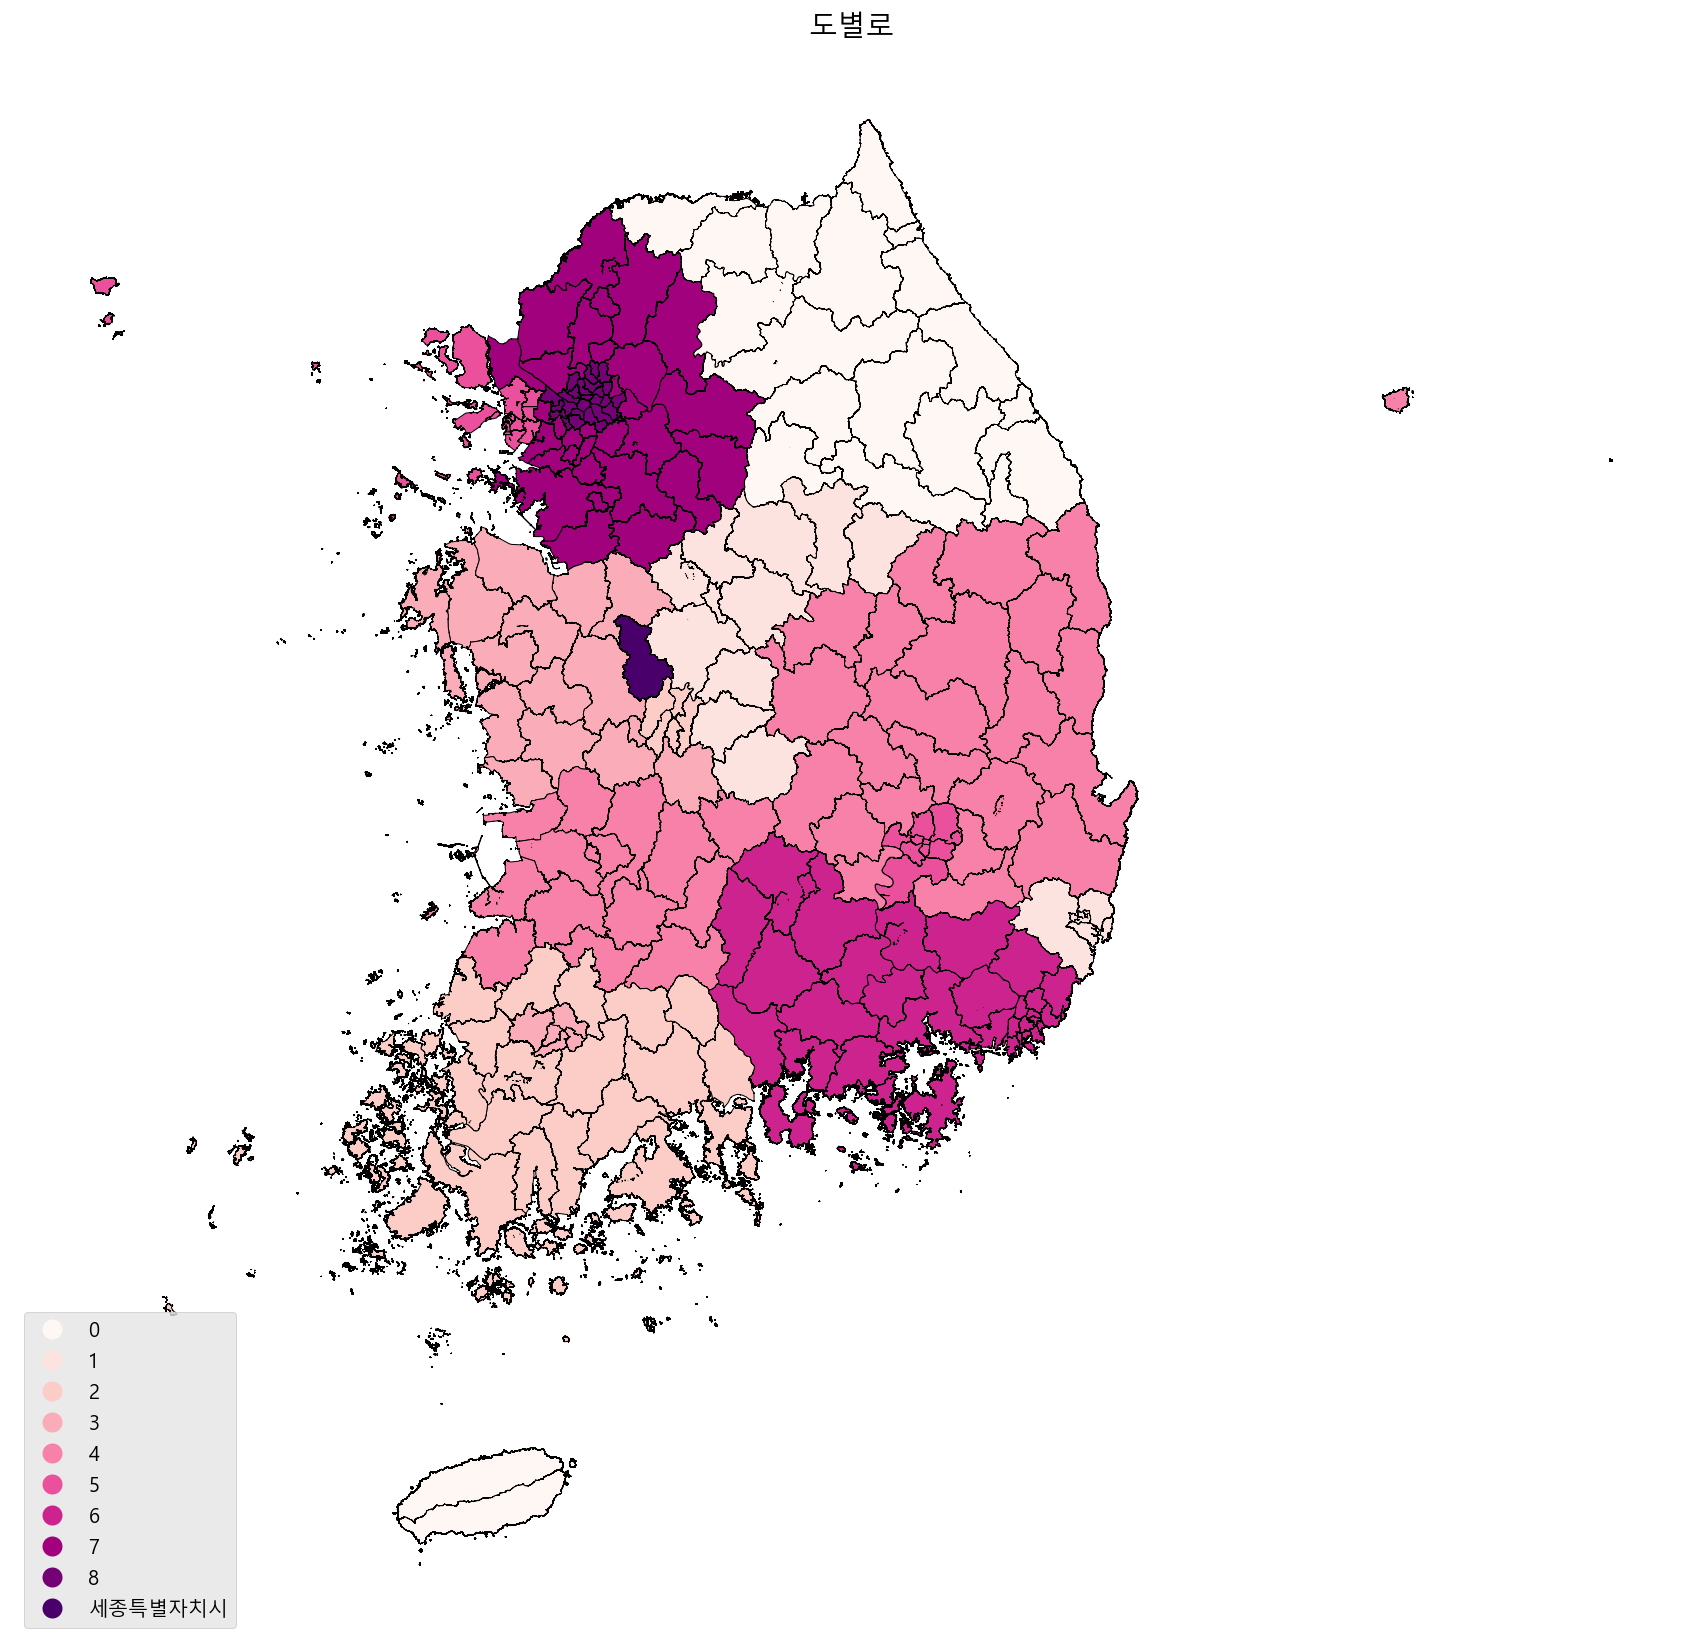

In [158]:
ax = map_data.plot(figsize=(15, 15), column="COLOR_NUM", categorical=True,
                cmap="RdPu", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("도별로")
ax.set_axis_off()
plt.show()

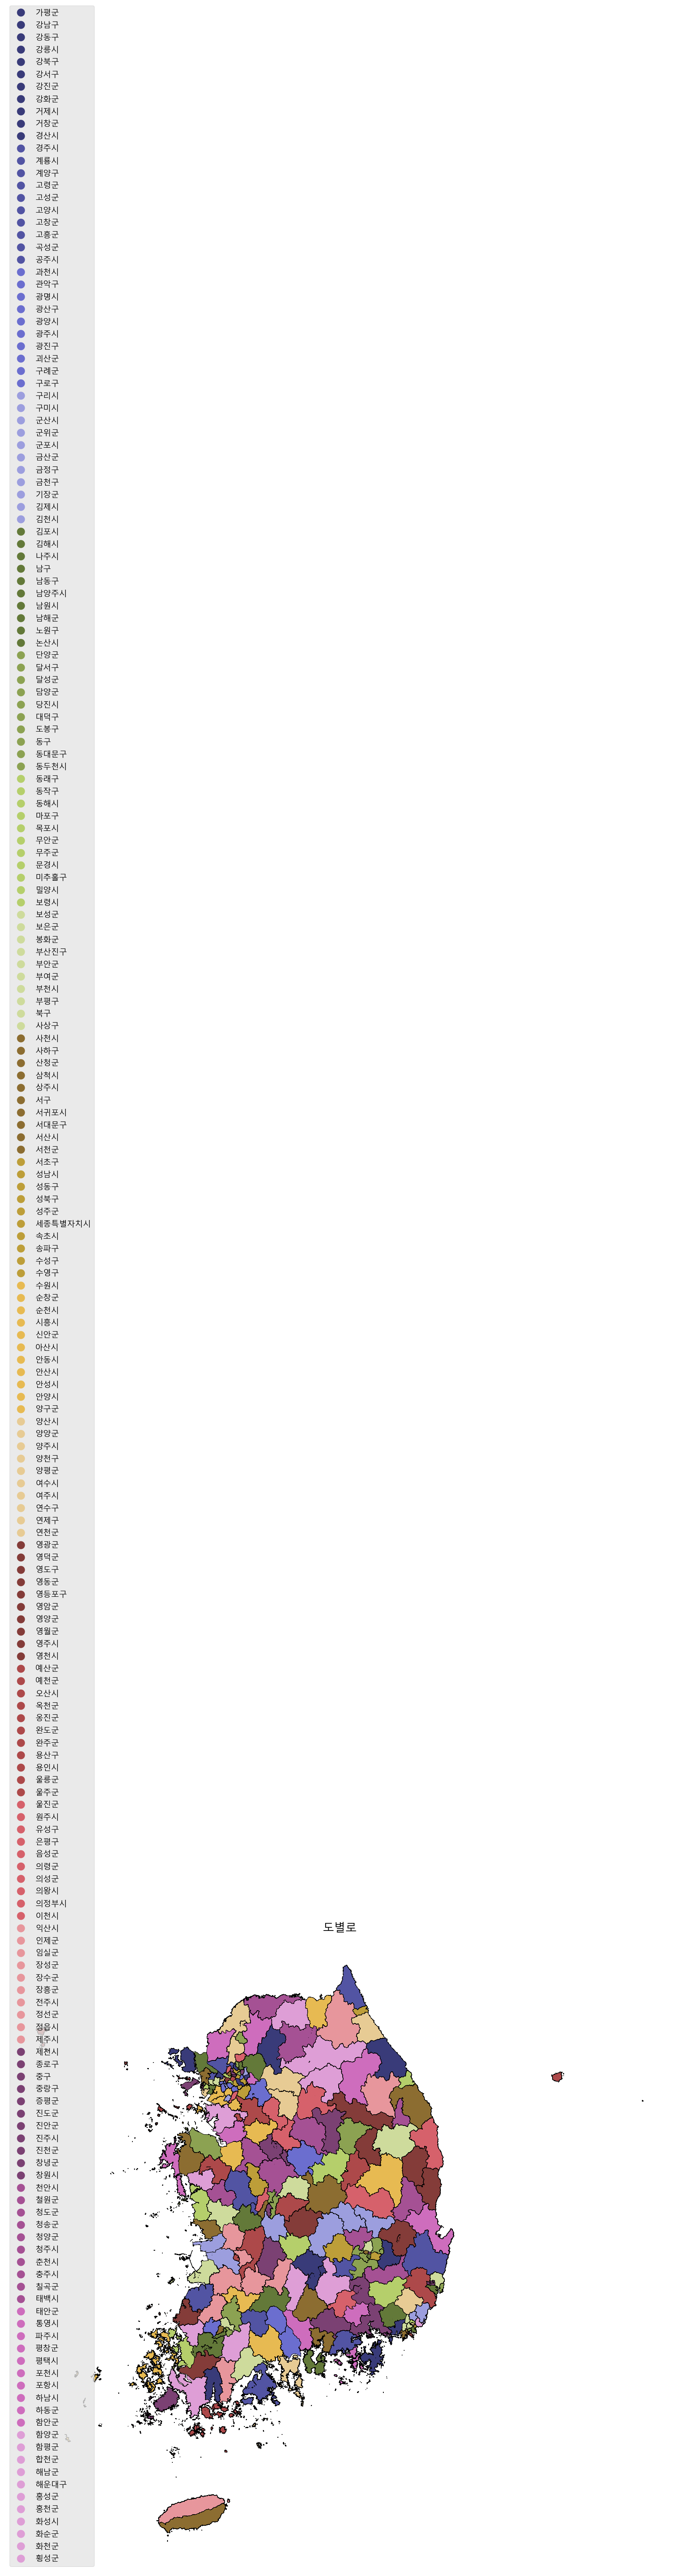

In [154]:
ax = map_data.plot(figsize=(15, 15), column="SIG_KOR_NM", categorical=True,
                cmap="tab20b", edgecolor="k", legend=True, legend_kwds={'loc': 3})
ax.set_title("도별로")
ax.set_axis_off()
plt.show()